In [5]:
import numpy as np
from numpy import fft
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque

import scipy.signal as signal

def get_image(filename):
    # Read file it np array
    im = misc.imread(filename) 

    plt.figure(figsize=(40,20))
    # Display with grayscale colour map 
    plt.imshow(im,cmap=plt.cm.gray)

    # Show the image
    plt.show()
    
    return im

In [60]:
def shift_image(im):
    shifted_im = [im[0]]

    for i in range(0,len(im)-1):

        A = fft.fft(shifted_im[i])
        B = fft.fft(im[i+1])
        Ar = -A.conjugate()
        Br = -B.conjugate()

        idx = np.argmax(np.abs(fft.ifft(Ar*B)))  

        if idx > len(im)/2.:
            idx = -idx+len(im)

        if idx == 0:
            shifted_im.append(im[i+1])
        else:
            shifted_im.append(list(im[i+1][idx:])+list(im[i+1][:idx]))
            
    plt.figure(figsize=(40,20))
    plt.imshow(shifted_im,cmap='gray')

In [64]:
def fix_image(im):
    fixed_im = [im[0]]

    for i in range(0,len(im)-1):

        A = fft.fft(fixed_im[i])
        B = fft.fft(im[i+1])
        Ar = -A.conjugate()
        Br = -B.conjugate()

        idx = np.argmax(np.abs(fft.ifft(Ar*B)))  
        
        if idx == 0:
            fixed_im.append(im[i+1])
        elif idx > len(im)/2.:
            averages = [im[i][x] if i+2 == len(im) else (im[i][x]+im[i+2][x])/2. for x in range(0,len(im)-1-idx)]
            fixed_im.append(np.array(averages+list(im[i+1][:idx+1])))
        else:
            # for each pixel that was shifted on the other side get average val of above and below
            averages = [im[i][x] if i+2 == len(im) else (im[i][x]+im[i+2][x])/2. for x in range(len(im)-1-idx,len(im)-1)]
            fixed_im.append(np.array(list(im[i+1][idx:])+averages))
            
    plt.figure(figsize=(40,20))
    plt.imshow(fixed_im,cmap='gray')
    
    return fixed_im

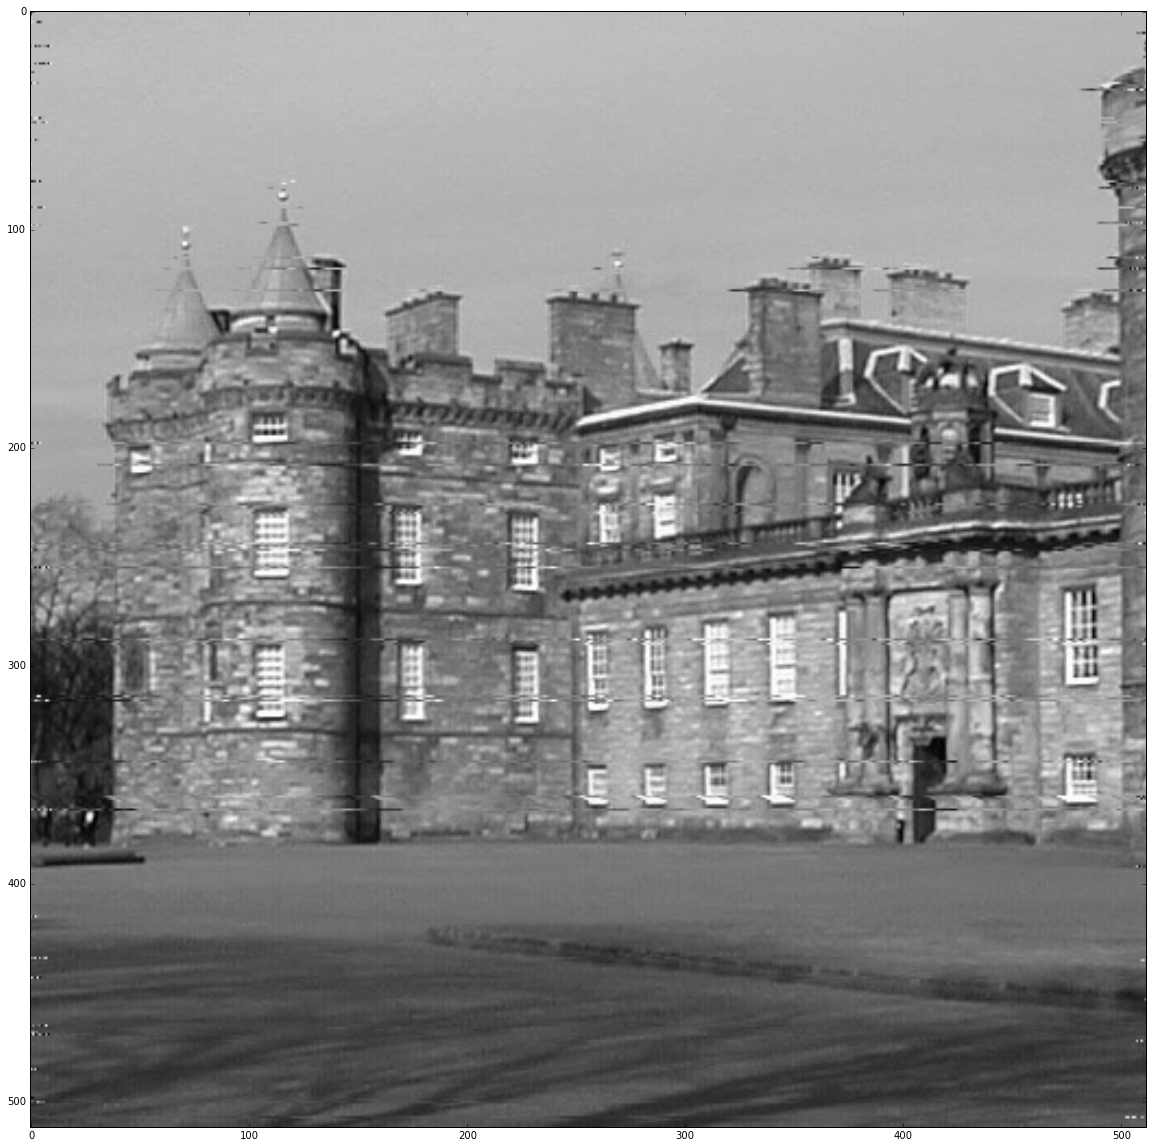

/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: overflow encountered in ubyte_scalars


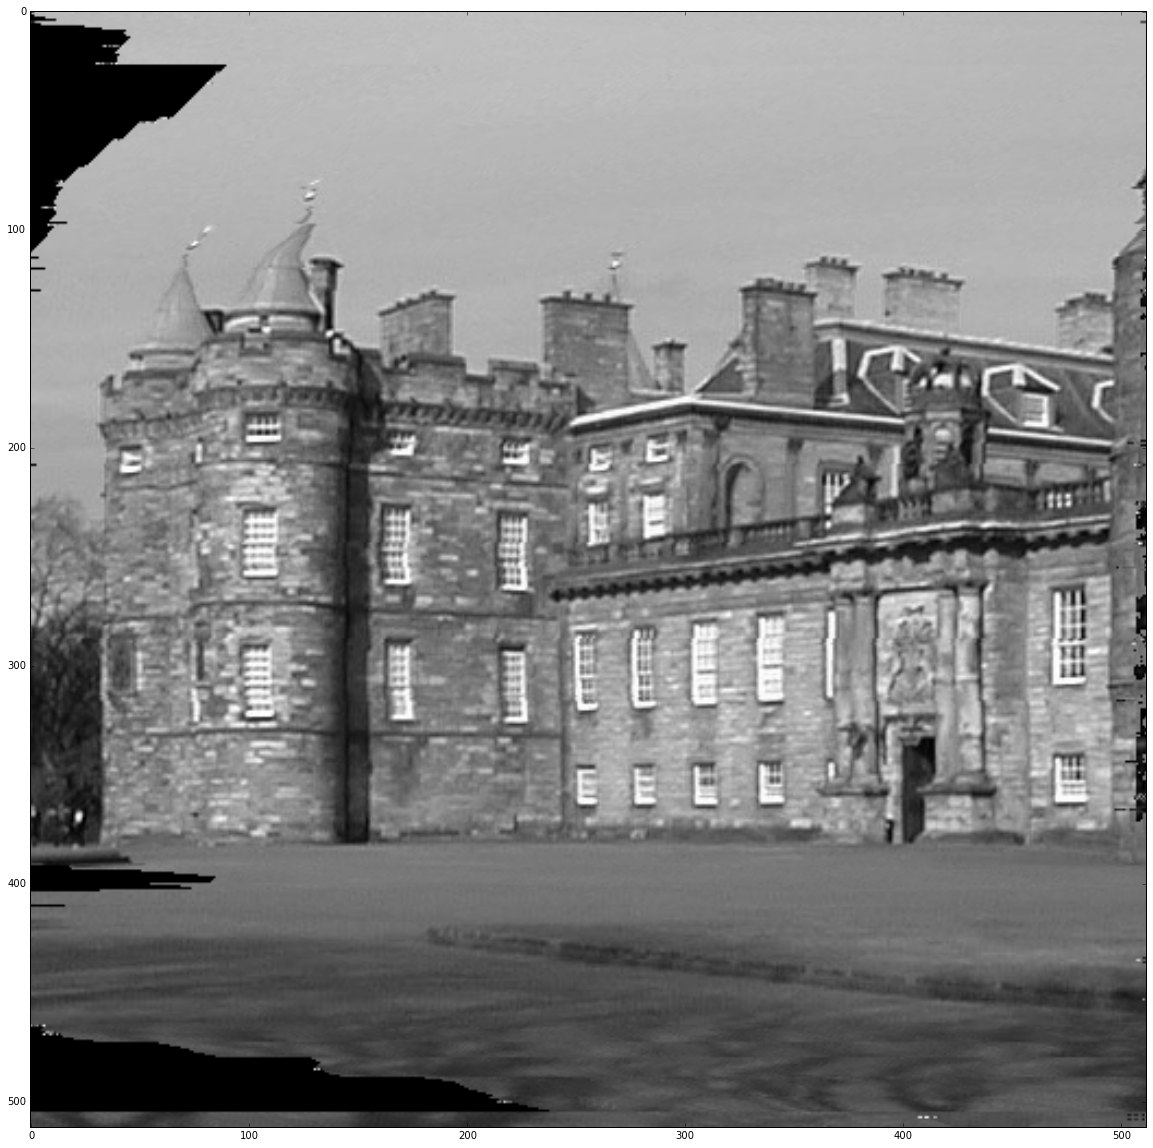

In [65]:
fixed_im = fix_image(get_image('images/desync1.pgm'))

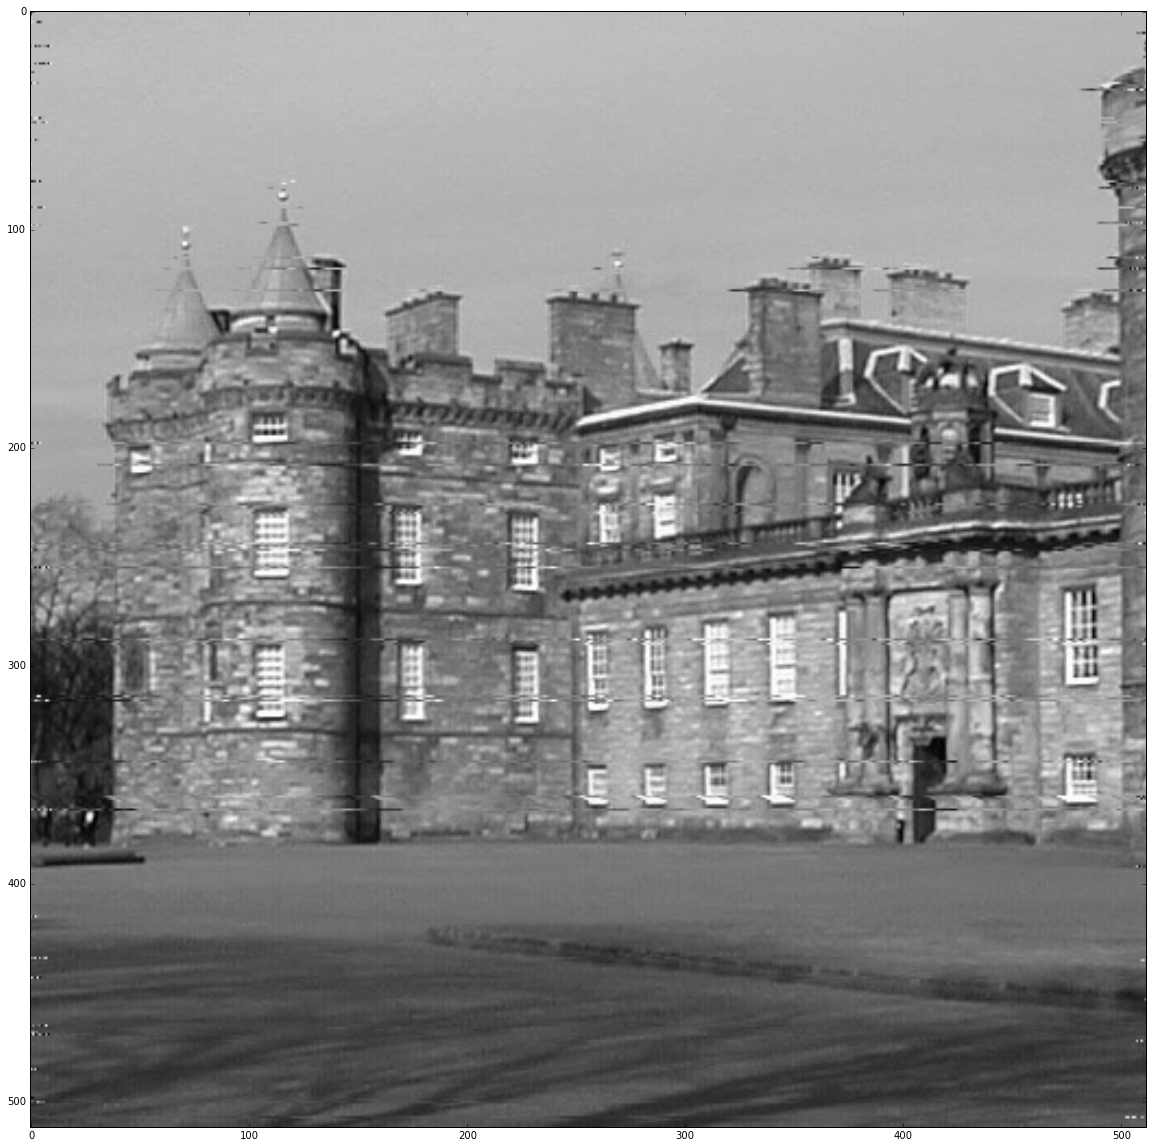

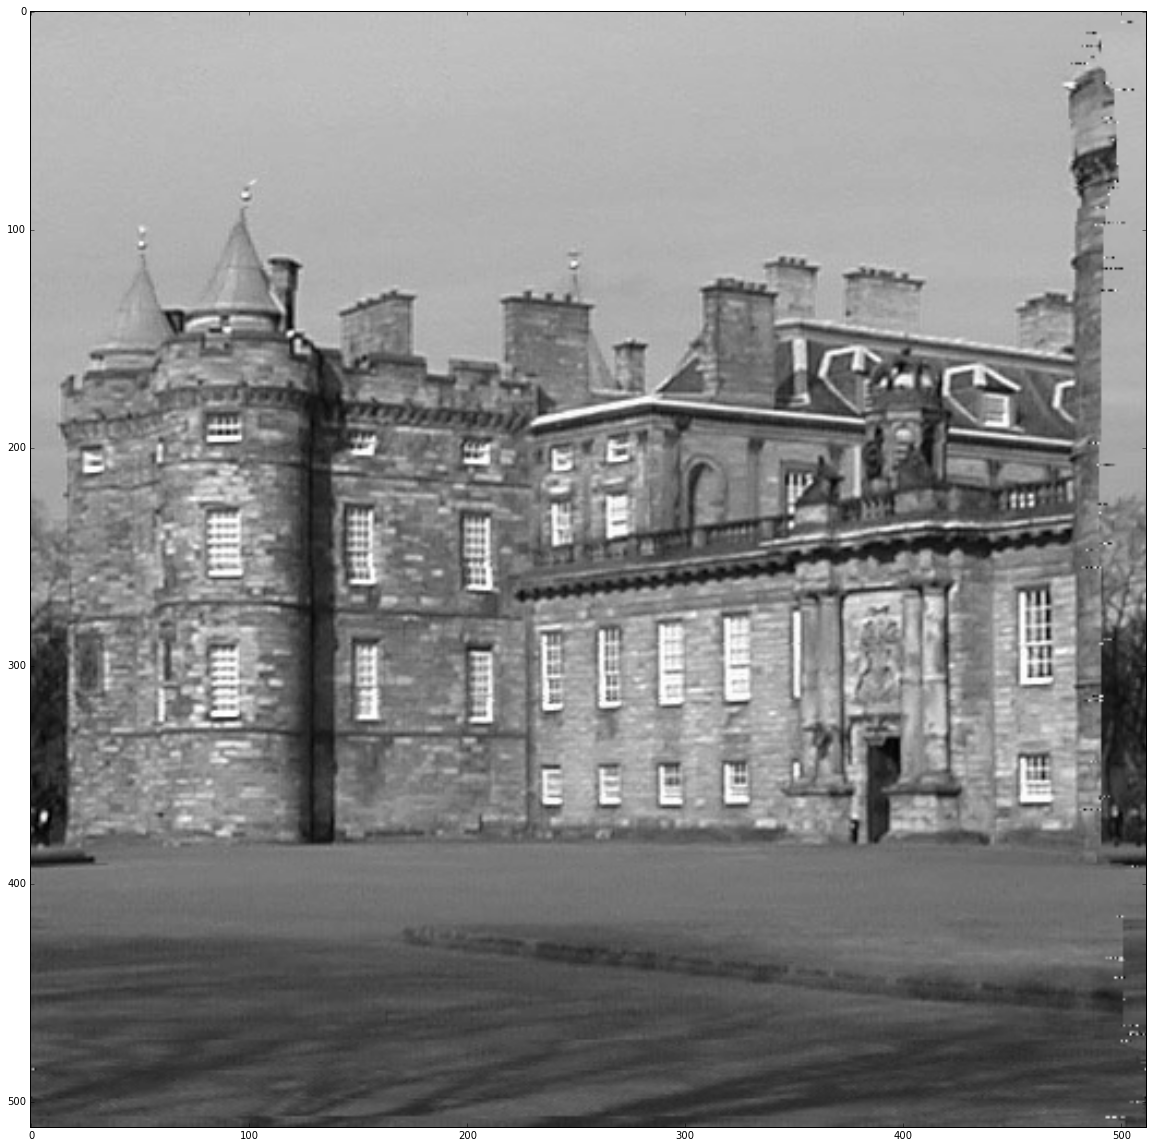

In [61]:
shift_image(get_image('images/desync1.pgm'))